In [1]:
import numpy as np
import  tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dir="E:\cat vs dog"

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\jramy\AppData\Local\Temp\ipykernel_11968\3570209970.py:1: SyntaxWarning: invalid escape sequence '\c'
  dir="E:\cat vs dog"


In [3]:
datagen=ImageDataGenerator(
validation_split=0.2,
rescale=1./255)

In [4]:
training=datagen.flow_from_directory(
dir,
target_size=(256,256),
batch_size=25,
class_mode="binary",
subset="training")

Found 184 images belonging to 2 classes.


In [5]:
testing=datagen.flow_from_directory(
dir,
target_size=(256,256),
batch_size=25,
class_mode="binary",
subset="validation")

Found 44 images belonging to 2 classes.


In [6]:
model=tf.keras.Sequential()

In [7]:

model.add(Conv2D(32,(3,3),activation="relu",input_shape=(256,256,3)))
model.add(MaxPooling2D((8,8)))  

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D((4,4))) 

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))  

model.add(Flatten())

model.add(Dense(218,activation="relu"))
model.add(Dense(1,activation="sigmoid"))  


C:\Users\jramy\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 5, 5, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 218)                 │         111,834 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             219 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 205,301 (801.96 KB)

 Trainable params: 205,301 (801.96 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [10]:
steps_per_epoch_training=training.samples//training.batch_size
steps_per_epoch_training

7

In [11]:
step_per_epoch_valid=testing.samples//testing.batch_size
step_per_epoch_valid

1

In [12]:
fit=model.fit(
training,
steps_per_epoch=steps_per_epoch_training,
epochs=20,
validation_data=testing,
validation_steps=step_per_epoch_valid)

Epoch 1/20


C:\Users\jramy\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.4686 - loss: 0.7155

C:\Users\jramy\AppData\Roaming\Python\Python312\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 674ms/step - accuracy: 0.4698 - loss: 0.7147 - val_accuracy: 0.5200 - val_loss: 0.6916
Epoch 2/20
1/7 ━━━━━━━━━━━━━━━━━━━━ 3s 511ms/step - accuracy: 0.6000 - loss: 0.6874

C:\Users\jramy\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.6000 - loss: 0.6874 - val_accuracy: 0.5263 - val_loss: 0.6870
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 364ms/step - accuracy: 0.5633 - loss: 0.6862
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.5200 - loss: 0.6831 - val_accuracy: 0.5200 - val_loss: 0.6874
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 451ms/step - accuracy: 0.5706 - loss: 0.6794 - val_accuracy: 0.6842 - val_loss: 0.6372
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5600 - loss: 0.6754  
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 471ms/step - accuracy: 0.5261 - loss: 0.6686 - val_accuracy: 0.6000 - val_loss: 0.6499
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.6800 - loss: 0.6558 - val_accuracy: 0.7368 - val_loss: 0.6378
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 370ms/step - accuracy: 0.6341 - loss: 0.6471
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.7200 - loss: 0.6028 - val_accuracy: 0.6800 - val_loss: 0.6082
Epoc

In [13]:
print("Class indices:", training.class_indices)


Class indices: {'Cat': 0, 'Dog': 1}


In [14]:
def predicted_image(filename):
    imgs=load_img(filename,target_size=(256,256))
    plt.imshow(imgs)
    plt.show()
    img_array=img_to_array(imgs)
    img_array=np.expand_dims(img_array,axis=0)
    img_array/=255.0
    
    prediction=model.predict(img_array)
    predicted_probability=prediction[0,0]
    class_idx=int(prediction>0.5)
    
    if class_idx==0:
        print("Cat")
    else:
        print("Dog")

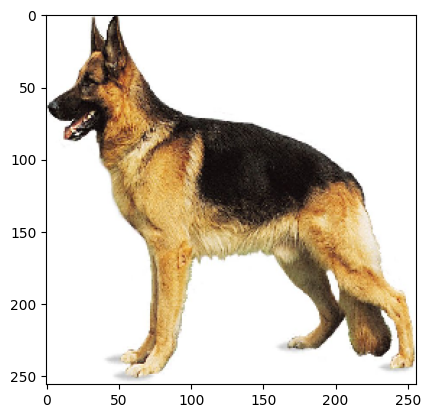

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Dog


C:\Users\jramy\AppData\Local\Temp\ipykernel_11968\3141348063.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  class_idx=int(prediction>0.5)


In [36]:
predicted_image(r"E:\cat vs dog\Dog\German-shepherd.jpg")

In [16]:
#predicted_image(r"E:\bat vs bat\testing_.jpeg")